In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

# Check if there are highly correlated features and drop them if there are any.


In [3]:
dmca=pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round3.csv")
dmca

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
dmca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [5]:
#First let's separate categorical and Numerical data using next function for number and with the variation 
# = np.object for Categorical data
dmca_number=dmca.select_dtypes(include = np.number)
dmca_number

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [6]:
dmca_obj=dmca.select_dtypes(include = object)
dmca_obj

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


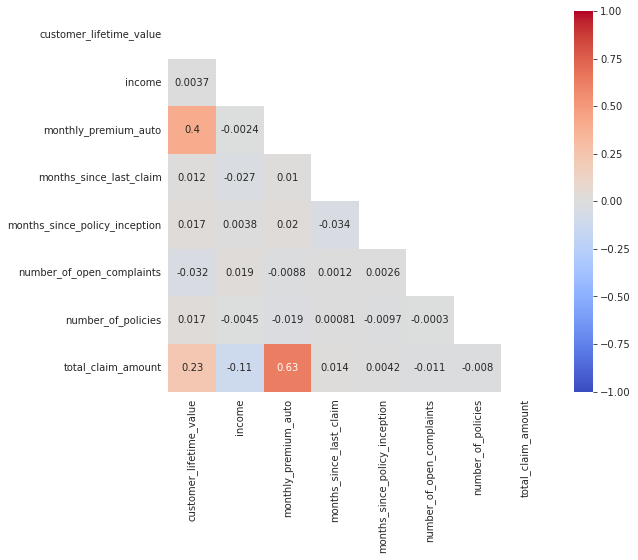

In [7]:
# Use the following function to check if there is high correlation between numerical features
corr = dmca_number.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [8]:
#There is no high correlation , so we don't need to drop any column

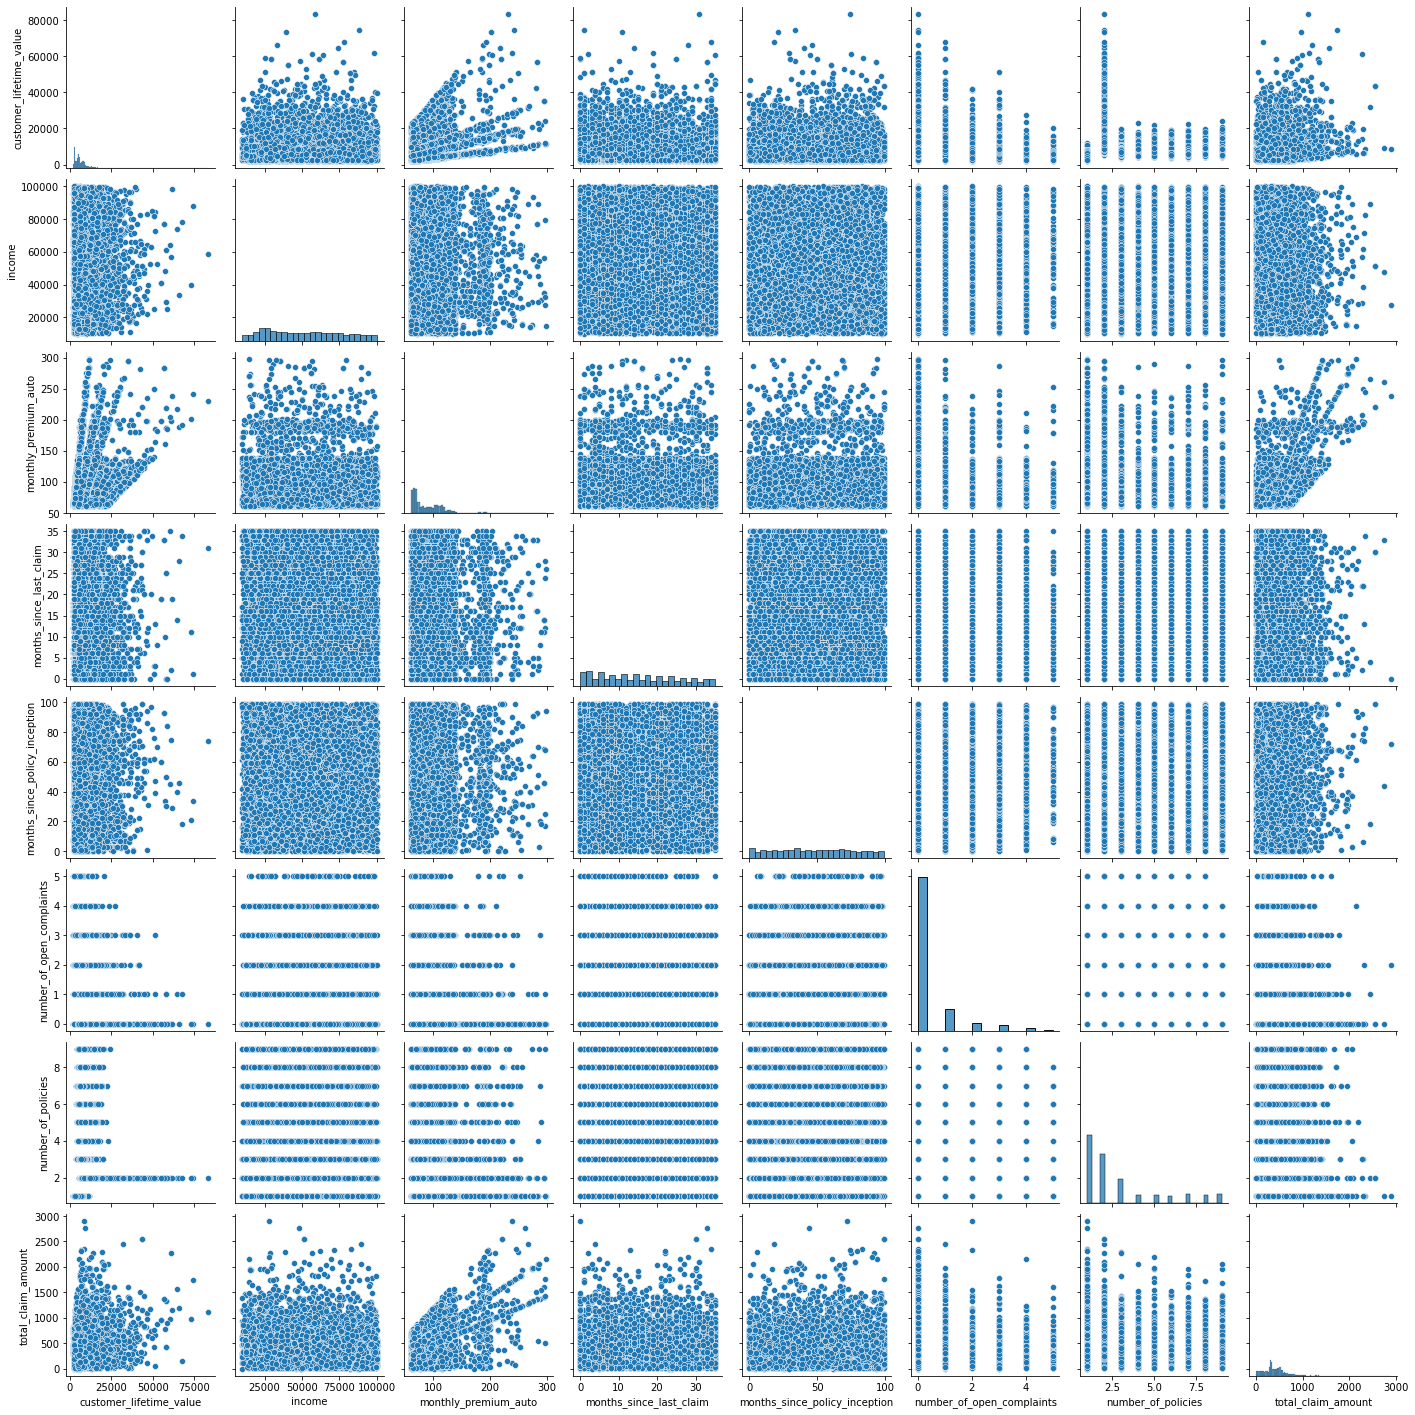

In [9]:
sns.pairplot(dmca_number)

In [10]:
#There is not high correlation between the features, so we don't need to drop any column 

# One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [11]:
dmca_obj

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


# One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [12]:
dmca_obj['coverage']

0           basic
1           basic
2           basic
3        extended
4         premium
           ...   
10684     premium
10685       basic
10686    extended
10687     premium
10688       basic
Name: coverage, Length: 10689, dtype: object

In [13]:
dmca_obj['month'].value_counts()

jan    5684
feb    5005
Name: month, dtype: int64

In [14]:
# Let's create 2 dataframes, one for One Hot encoding and another one for Label Encoding
#Label enconding: coverage, education, policy, renew_offer_type
dmca_obj["coverage"]= dmca_obj["coverage"].replace(["basic","extended","premium"],["1","2","3"])
dmca_obj["education"]= dmca_obj["education"].replace(["bachelor","college","high school or below","master","doctor"],["1","2","3","4","5"])
dmca_obj["policy"]= dmca_obj["policy"].replace(["personal l3","personal l2","personal l1","corporate l3","corporate l2","corporate l1","special l2","special l1","special l3"],["1","1","1","2","2","2","3","3","3"])
dmca_obj["renew_offer_type"]= dmca_obj["renew_offer_type"].replace(["offer1","offer2","offer3","offer4"],["1","2","3","4"])

dmca_obj

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,1,2,2/18/11,feb,employed,m,suburban,married,corporate auto,2,3,agent,four-door car,medsize
1,west region,no,1,2,1/18/11,jan,unemployed,f,suburban,single,personal auto,1,4,call center,four-door car,medsize
2,east,no,1,1,2/10/11,feb,employed,m,suburban,single,personal auto,1,3,call center,suv,medsize
3,north west,yes,2,2,1/11/11,jan,employed,m,suburban,single,corporate auto,2,2,branch,four-door car,medsize
4,north west,no,3,1,1/17/11,jan,medical leave,f,suburban,married,personal auto,1,1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,3,1,1/19/11,jan,unemployed,f,suburban,married,personal auto,1,3,web,luxury car,medsize
10685,north west,no,1,2,1/6/11,jan,employed,f,urban,married,personal auto,1,2,branch,four-door car,medsize
10686,central,no,2,1,2/6/11,feb,employed,f,rural,married,corporate auto,2,1,web,luxury suv,medsize
10687,west region,no,3,2,2/13/11,feb,employed,f,urban,divorced,personal auto,1,1,branch,suv,medsize


In [15]:
#create a new dataframe with labels coded columns
ordinals = dmca_obj[['education', 'coverage', 'policy', 'renew_offer_type']]
ordinals

,education,coverage,policy,renew_offer_type
0,2,1,2,3
1,2,1,1,4
2,1,1,1,3
3,2,2,2,2
4,1,3,1,1
...,...,...,...,...
10684,1,3,1,3
10685,2,1,1,2
10686,1,2,2,1
10687,2,3,1,1


In [16]:
#create a dataframe with only the rest of the columns (One Hot coding)
nominals = dmca_obj
nominals.drop(columns=['coverage','policy','renew_offer_type','effective_to_date'], axis = 1, inplace = True) 


In [17]:
nominals

,region,response,education,month,employment_status,gender,location_code,marital_status,policy_type,sales_channel,vehicle_class,vehicle_size
0,central,no,2,feb,employed,m,suburban,married,corporate auto,agent,four-door car,medsize
1,west region,no,2,jan,unemployed,f,suburban,single,personal auto,call center,four-door car,medsize
2,east,no,1,feb,employed,m,suburban,single,personal auto,call center,suv,medsize
3,north west,yes,2,jan,employed,m,suburban,single,corporate auto,branch,four-door car,medsize
4,north west,no,1,jan,medical leave,f,suburban,married,personal auto,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,1,jan,unemployed,f,suburban,married,personal auto,web,luxury car,medsize
10685,north west,no,2,jan,employed,f,urban,married,personal auto,branch,four-door car,medsize
10686,central,no,1,feb,employed,f,rural,married,corporate auto,web,luxury suv,medsize
10687,west region,no,2,feb,employed,f,urban,divorced,personal auto,branch,suv,medsize


In [18]:
#Use One Hot codign for nominals
nominals=pd.get_dummies(nominals, drop_first=True)
nominals


,region_east,region_north west,region_west region,response_yes,education_2,education_3,education_4,education_5,month_jan,employment_status_employed,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0


In [19]:
#Concatenate nominals and ordinals in one dataframe
categorical= pd.concat([ordinals, nominals], axis=1)



In [20]:
categorical

,education,coverage,policy,renew_offer_type,region_east,region_north west,region_west region,response_yes,education_2,education_3,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,2,1,2,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,1,4,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,1,1,1,3,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,2,2,2,2,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
4,1,3,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,3,1,3,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,2,1,1,2,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10686,1,2,2,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,2,3,1,1,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0


# Linear Regression

In [21]:
# X-y split (y is the target variable, which is the total claim amount)
dmca_number

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [22]:
X=dmca_number.drop('total_claim_amount', axis=1)
y=dmca_number.total_claim_amount
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


In [23]:
X=X._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

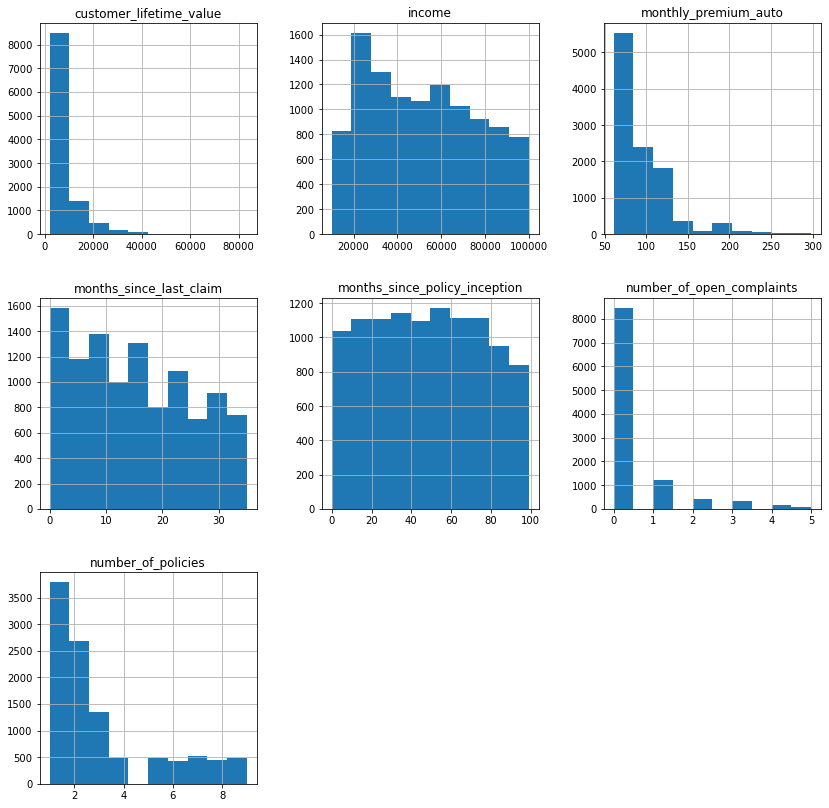

In [24]:
# Visually check of the number dataframe
X.hist(figsize=(14,14))

# Train-test split.

In [25]:
#We use this function to get these variables, which will use later to create our modell.
# We divide our set on two sets: train_set(70%) and test_set (30%)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

# Standardize the data

In [26]:
# We are going to scale the X_train to help the system to process the data and minimize the errors.
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [27]:
#We use the following function to check how is X_train (rows and columns)
X_train.shape

(7482, 7)

# Linear Regression

In [28]:
# Repetition of the process with X_test
X_test_scaled=std_scaler.transform(X_test)
X_test_scaled

array([[-0.40967729,  1.58428551, -0.61362178, ...,  1.54444214,
        -0.42500069,  2.51614162],
       [-0.7597249 , -0.93947257, -0.64253   , ...,  0.755633  ,
         0.67949919, -0.82094758],
       [ 0.57248529, -1.23371005, -0.90270406, ...,  0.39708339,
        -0.42500069, -0.40381143],
       ...,
       [-0.79857077, -1.05867274, -0.58471355, ..., -1.18053489,
        -0.42500069, -0.82094758],
       [-0.42547654, -0.97370317, -0.81597938, ..., -1.61079442,
         0.67949919,  0.43046087],
       [-0.49881985, -0.95695203,  0.71615674, ..., -1.00126009,
        -0.42500069, -0.82094758]])

In [29]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823 ...  1.36516733 -0.42500069
  -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 ...  1.68786198 -0.42500069
   0.84759702]
 [-0.5223013   0.26592193  0.48489091 ...  0.50464827 -0.42500069
  -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -1.39566466 -0.42500069
  -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115 ... -1.61079442 -0.42500069
  -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532 ...  0.21780858  1.78399907
  -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178 ...  1.54444214 -0.42500069
   2.51614162]
 [-0.7597249  -0.93947257 -0.64253    ...  0.755633    0.67949919
  -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 ...  0.39708339 -0.42500069
  -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ... -1.18053489 -0.42500069
  -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938 ... -1.61079442  0.67949919
   0.43046087]
 [-0.49881985 -0.95695203  0.71615674 ... -1.00126009 -0.42500069
  -0.82094758]]


In [30]:
#Modeling using Statsmodels.
#We get OLS regression results and define our modell 
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     742.9
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:01:53   Log-Likelihood:                -51168.
No. Observations:                7482   AIC:                         1.024e+05
Df Residuals:                    7474   BIC:                         1.024e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      2.612    165.770      0.0

In [31]:
#x values from our modell 
predictions_test

array([260.52304948, 353.76752657, 297.68091412, ..., 367.57334203,
       317.67903438, 608.06079373])

In [32]:
#display adjusted R-squared
print(model.rsquared_adj)

0.40976457437034053


### Model fitting

In [33]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

### Model parameters b1,b2,...b7

In [34]:
# In our regression modell (y= α + βx), model.coef=β
model.coef_

array([ -6.5986299 , -33.18126217, 187.80190938,   1.90598135,
        -0.91148552,   1.71705592,  -2.32015745])

In [35]:
#In our regression modell (y= α + βx), model.coef=α
model.intercept_

433.0597433841219

In [36]:
#y= -6.59* customer_lifetime_value  -33.18* income   187.80* monthly_premium_auto  1.90 * months_since_last_claim  -0.91 months_since_last_inception 1.71 number_of_open_complaints -2.32 number_of_policies
#It means, if we have a potential client, and we receive this the following information from him (customer life time value, income...) and we multiply thee by the constants obtained we will get the value of y (total claim amount) 

### Making prediction

In [37]:
# Now we are going to get_test y and y_train based in X_test and X_train respectivly
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [38]:
y_pred

array([260.52304948, 353.76752657, 297.68091412, ..., 367.57334203,
       317.67903438, 608.06079373])

In [39]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

### predicting on new data

In [40]:
#We are going to test our modell with a new modell.
np.array(np.array(new_data).reshape(-1,7)).shape

NameError: name 'new_data' is not defined

In [ ]:
X_train

In [ ]:
## new record 
new_data=[1500,4500,70,17,35,1,4]
new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,7))

In [ ]:
model.predict(new_data_scaled)

## Evaluating Model Performance

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
#We can see the difference between y_test and y_pred
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

In [ ]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

### Error metrics

In [ ]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

In [ ]:
##prediction on the train set
mse(y_train,y_pred_train)

In [ ]:
#Use the following function to get the R2
R2=r2_score(y_test,y_pred)
R2

In [ ]:
#Use the following function to get the a R2
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
R2_test

In [ ]:
R2_train

In [ ]:
##Use the following function to get the a adjusted R2, which tell us the accuracy of our modell
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

#### Feature Importance

In [ ]:
# With this function we check which of our constance have hihger influence in our linearity
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [ ]:
features_importances

In [ ]:
#we create this plot to visually check the influence of our constances in our linearity
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Repeat the process adding the hot and label encoded categorical variables

In [ ]:
#First check if we have outliers in our dataframes (categorical and dmca_number)
plt.boxplot(dmca_number)

In [ ]:
#we find outliers in customer_lifetime_value and income columns

In [56]:
final_df2= pd.concat([categorical, dmca_number], axis=1)
final_df

,education,coverage,policy,renew_offer_type,region_east,region_north west,region_west region,response_yes,education_2,education_3,...,vehicle_class_suv,vehicle_class_two-door car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2,1,2,3,0,0,0,0,1,0,...,0,0,4809,48029,61,7,52,0,9,292
1,2,1,1,4,0,0,1,0,1,0,...,0,0,2228,92260,64,3,26,0,1,744
2,1,1,1,3,1,0,0,0,0,0,...,1,0,14947,22139,100,34,31,0,2,480
3,2,2,2,2,0,1,0,1,1,0,...,0,0,22332,49078,97,10,3,0,2,484
4,1,3,1,1,0,1,0,0,0,0,...,0,0,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,3,1,3,0,0,0,0,0,0,...,0,0,15563,61541,253,12,40,0,7,1214
10685,2,1,1,2,0,1,0,0,1,0,...,0,0,5259,61146,65,7,68,0,6,273
10686,1,2,2,1,0,0,0,0,0,0,...,0,0,23893,39837,201,11,63,0,2,381
10687,2,3,1,1,0,0,1,0,1,0,...,1,0,11971,64195,158,0,27,4,6,618


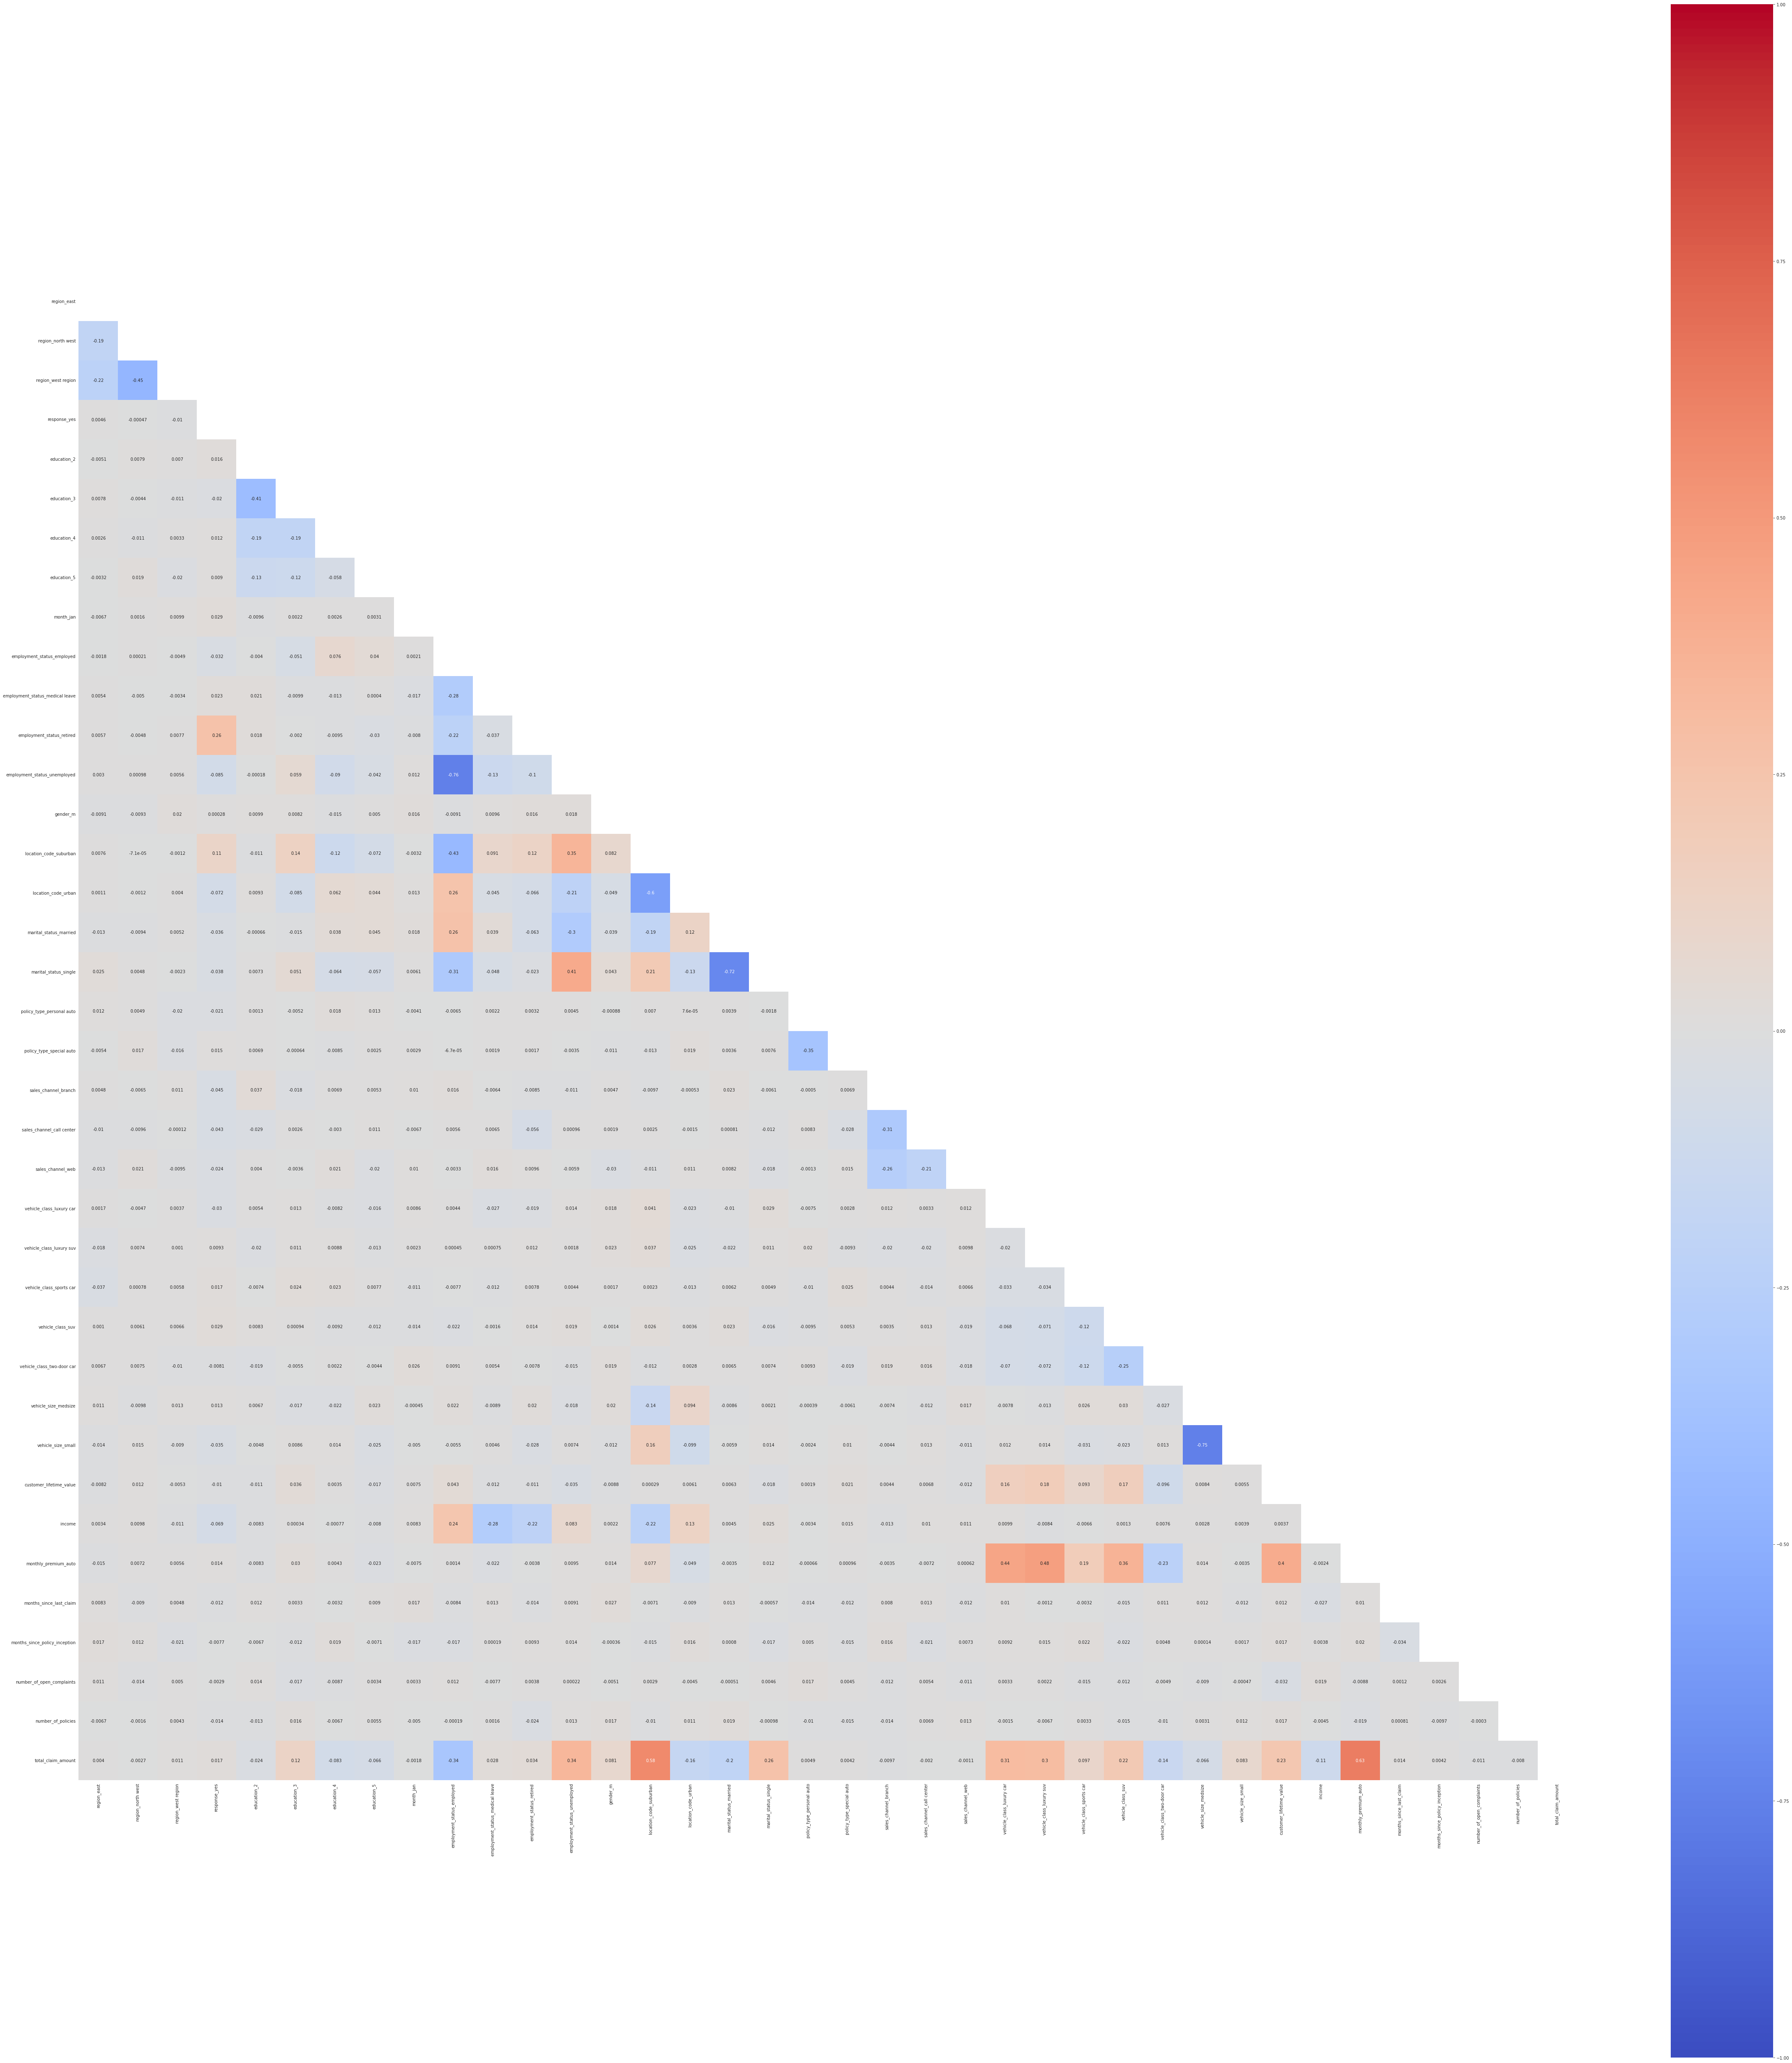

In [47]:
#check if there is hihg correlation between the features

corr = final_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(80, 90))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [62]:
final_df2.drop(columns=['vehicle_size_medsize','vehicle_size_small','employment_status_employed','employment_status_unemployed ','marital_status_married','marital_status_single '], axis = 1, inplace = True) 


KeyError: "['employment_status_unemployed ', 'marital_status_single '] not found in axis"

In [60]:
final_df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   education                        10689 non-null  object
 1   coverage                         10689 non-null  object
 2   policy                           10689 non-null  object
 3   renew_offer_type                 10689 non-null  object
 4   region_east                      10689 non-null  uint8 
 5   region_north west                10689 non-null  uint8 
 6   region_west region               10689 non-null  uint8 
 7   response_yes                     10689 non-null  uint8 
 8   education_2                      10689 non-null  uint8 
 9   education_3                      10689 non-null  uint8 
 10  education_4                      10689 non-null  uint8 
 11  education_5                      10689 non-null  uint8 
 12  month_jan                       

In [51]:
final_df


,education,coverage,policy,renew_offer_type,region_east,region_north west,region_west region,response_yes,education_2,education_3,...,vehicle_class_suv,vehicle_class_two-door car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2,1,2,3,0,0,0,0,1,0,...,0,0,4809,48029,61,7,52,0,9,292
1,2,1,1,4,0,0,1,0,1,0,...,0,0,2228,92260,64,3,26,0,1,744
2,1,1,1,3,1,0,0,0,0,0,...,1,0,14947,22139,100,34,31,0,2,480
3,2,2,2,2,0,1,0,1,1,0,...,0,0,22332,49078,97,10,3,0,2,484
4,1,3,1,1,0,1,0,0,0,0,...,0,0,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,3,1,3,0,0,0,0,0,0,...,0,0,15563,61541,253,12,40,0,7,1214
10685,2,1,1,2,0,1,0,0,1,0,...,0,0,5259,61146,65,7,68,0,6,273
10686,1,2,2,1,0,0,0,0,0,0,...,0,0,23893,39837,201,11,63,0,2,381
10687,2,3,1,1,0,0,1,0,1,0,...,1,0,11971,64195,158,0,27,4,6,618


In [54]:
nominals

,region_east,region_north west,region_west region,response_yes,education_2,education_3,education_4,education_5,month_jan,employment_status_employed,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
